기상자료개방포털 : https://data.kma.go.kr

In [1]:
import pandas as pd

#### 데이터 로드

In [5]:
# 7행까지의 데이터 설명 스킵하고 불러오기
df = pd.read_csv('busan_기온.csv', encoding = 'cp949', skiprows = 7)
df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9
...,...,...,...,...,...
43149,2022-05-29,159,22.6,19.2,26.6
43150,2022-05-30,159,20.7,17.2,23.9
43151,2022-05-31,159,21.6,18.4,27.4
43152,2022-06-01,159,22.2,18.5,27.5


#### 누락값 확인

In [8]:
df.count()

날짜         43154
지점         43154
평균기온(℃)    43154
최저기온(℃)    43144
최고기온(℃)    43150
일교차        43143
dtype: int64

In [13]:
df[pd.isnull(df['최저기온(℃)'])]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차
2,1904-04-11,159,10.6,NaN,14.9,NaN
8,1904-04-17,159,10.3,NaN,12.6,NaN
11,1904-04-20,159,11.9,NaN,NaN,NaN
12,1904-04-21,159,12.1,NaN,18.3,NaN
17,1904-04-26,159,14.5,NaN,17.6,NaN
28,1904-05-07,159,16.1,NaN,21.9,NaN
37,1904-05-16,159,16.3,NaN,21.1,NaN
40,1904-05-19,159,16.3,NaN,22.8,NaN
22961,1967-02-19,159,2.7,NaN,NaN,NaN
25392,1973-10-16,159,15.9,NaN,NaN,NaN


#### 가장 더웠던 날, 일교차가 가장 큰 날

In [6]:
# 가장 더웠던 날
df[df['최고기온(℃)'] == df['최고기온(℃)'].max()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
41035,2016-08-14,159,31.7,28.3,37.3


In [7]:
# 일교차가 가장 큰 날
df['일교차'] = df['최고기온(℃)'] - df['최저기온(℃)']
df[df['일교차'] == df['일교차'].max()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차
28729,1982-12-05,159,3.9,-3.3,15.2,18.5


#### 그래프

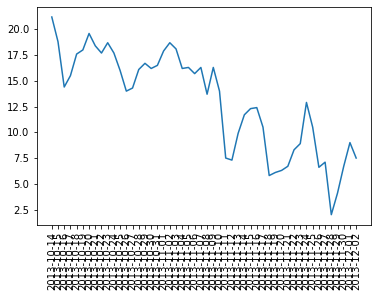

In [31]:
# 그래프 표현
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(df['날짜'][40000:40050], df['평균기온(℃)'][40000:40050])
plt.xticks(df['날짜'][40000:40050], rotation = 90)                  # rotation : x축 레이블 각도
plt.show()

#### 2000년 이후 3월 1일 이후 최고(최저) 기온 확인

In [22]:
# 연도/월/일 분리
df['연도'] = df['날짜'].apply(lambda x : x.split('-')[0])
df['월'] = df['날짜'].apply(lambda x : x.split('-')[1])
df['일'] = df['날짜'].apply(lambda x : x.split('-')[2])

df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차,연도,월,일
0,1904-04-09,159,11.3,7.8,16.1,8.3,1904,04,09
1,1904-04-10,159,9.3,4.7,15.2,10.5,1904,04,10
2,1904-04-11,159,10.6,NaN,14.9,NaN,1904,04,11
3,1904-04-12,159,11.3,8.8,13.4,4.6,1904,04,12
4,1904-04-13,159,14.5,11.1,16.9,5.8,1904,04,13


In [23]:
# 2000년 이후 연도만 리스트로 저장
year = df[df['연도'] >= '2000']['연도'].unique()
ticks = range(len(year))
print(year)
print(ticks)

['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022']
range(0, 23)


In [26]:
# 매년 3월 1일의 최고기온 확인
최고기온 = df[(df['연도'] >= '2000') &
              (df['월'] == '03') &
              (df['일'] == '01')]['최고기온(℃)']

최고기온.index = ticks
최고기온

0     12.1
1     11.9
2     15.1
3      8.6
4     10.0
5      9.4
6      6.4
7     14.5
8     13.4
9     13.6
10     9.9
11     9.7
12    12.5
13    14.2
14    11.4
15     9.6
16     7.7
17    13.8
18    12.0
19    16.1
20    15.6
21    15.5
22    15.0
Name: 최고기온(℃), dtype: float64

In [27]:
# 매년 3월 1일의 최저기온 확인
최저기온 = df[(df['연도'] >= '2000') &
              (df['월'] == '03') &
              (df['일'] == '01')]['최저기온(℃)']

최저기온.index = ticks
최저기온

0     1.0
1     6.0
2     6.8
3     5.7
4     4.5
5    -0.1
6     0.4
7     4.7
8     2.1
9     5.9
10    5.5
11    2.5
12    6.2
13    1.1
14    8.0
15    2.2
16   -4.3
17    6.2
18    2.7
19    7.0
20    7.2
21    5.2
22    8.3
Name: 최저기온(℃), dtype: float64

findfont: Font family ['Malgum Gothic'] not found. Falling back to DejaVu Sans.
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from curr

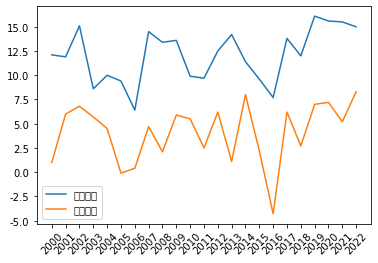

In [29]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgum Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.plot(최고기온, label = '최고기온')
plt.plot(최저기온, label = '최저기온')
plt.xticks(ticks, year, rotation =45)
plt.legend()
plt.show()

#### 연도별 평균 기온

연도
1904    16.880524
1905    13.973151
1906    13.076438
1907    13.579178
1908    13.347814
          ...    
2018    15.115068
2019    15.751507
2020    15.205464
2021    15.771233
2022    10.632680
Name: 평균기온(℃), Length: 119, dtype: float64


<AxesSubplot:xlabel='연도'>

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


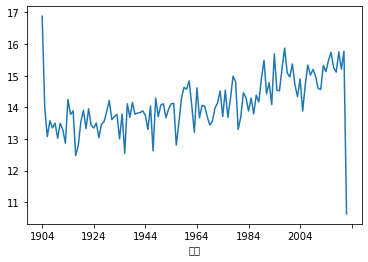

In [30]:
df_group = df.groupby('연도')['평균기온(℃)'].mean()
print(df_group)

df_group.plot()

#### 연도별 최고기온 데이터를 히스토그램으로 표현

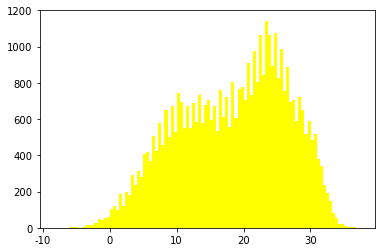

In [35]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgum Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.hist(df['최고기온(℃)'], bins = 100, color = 'yellow')    # bins : 히스토그램 막대수
plt.show()